In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [10]:
data = pd.read_csv('data.csv')
imputed_data_caliber = pd.read_csv('imputed_data_caliber_c.csv')
imputed_data_mice = pd.read_csv('imputed_data_mice_c.csv')
imputed_data_mixgb = pd.read_csv('imputed_data_mixgb.csv')
imputed_data_missforest = pd.read_csv('imputed_data_missforest.csv')
data_missing = pd.read_csv('data_missing.csv')
data_to_use = data.drop(['Rented_Bike_Count'], axis=1)
data_missing_imputed = data_missing.fillna(data_missing.mean())

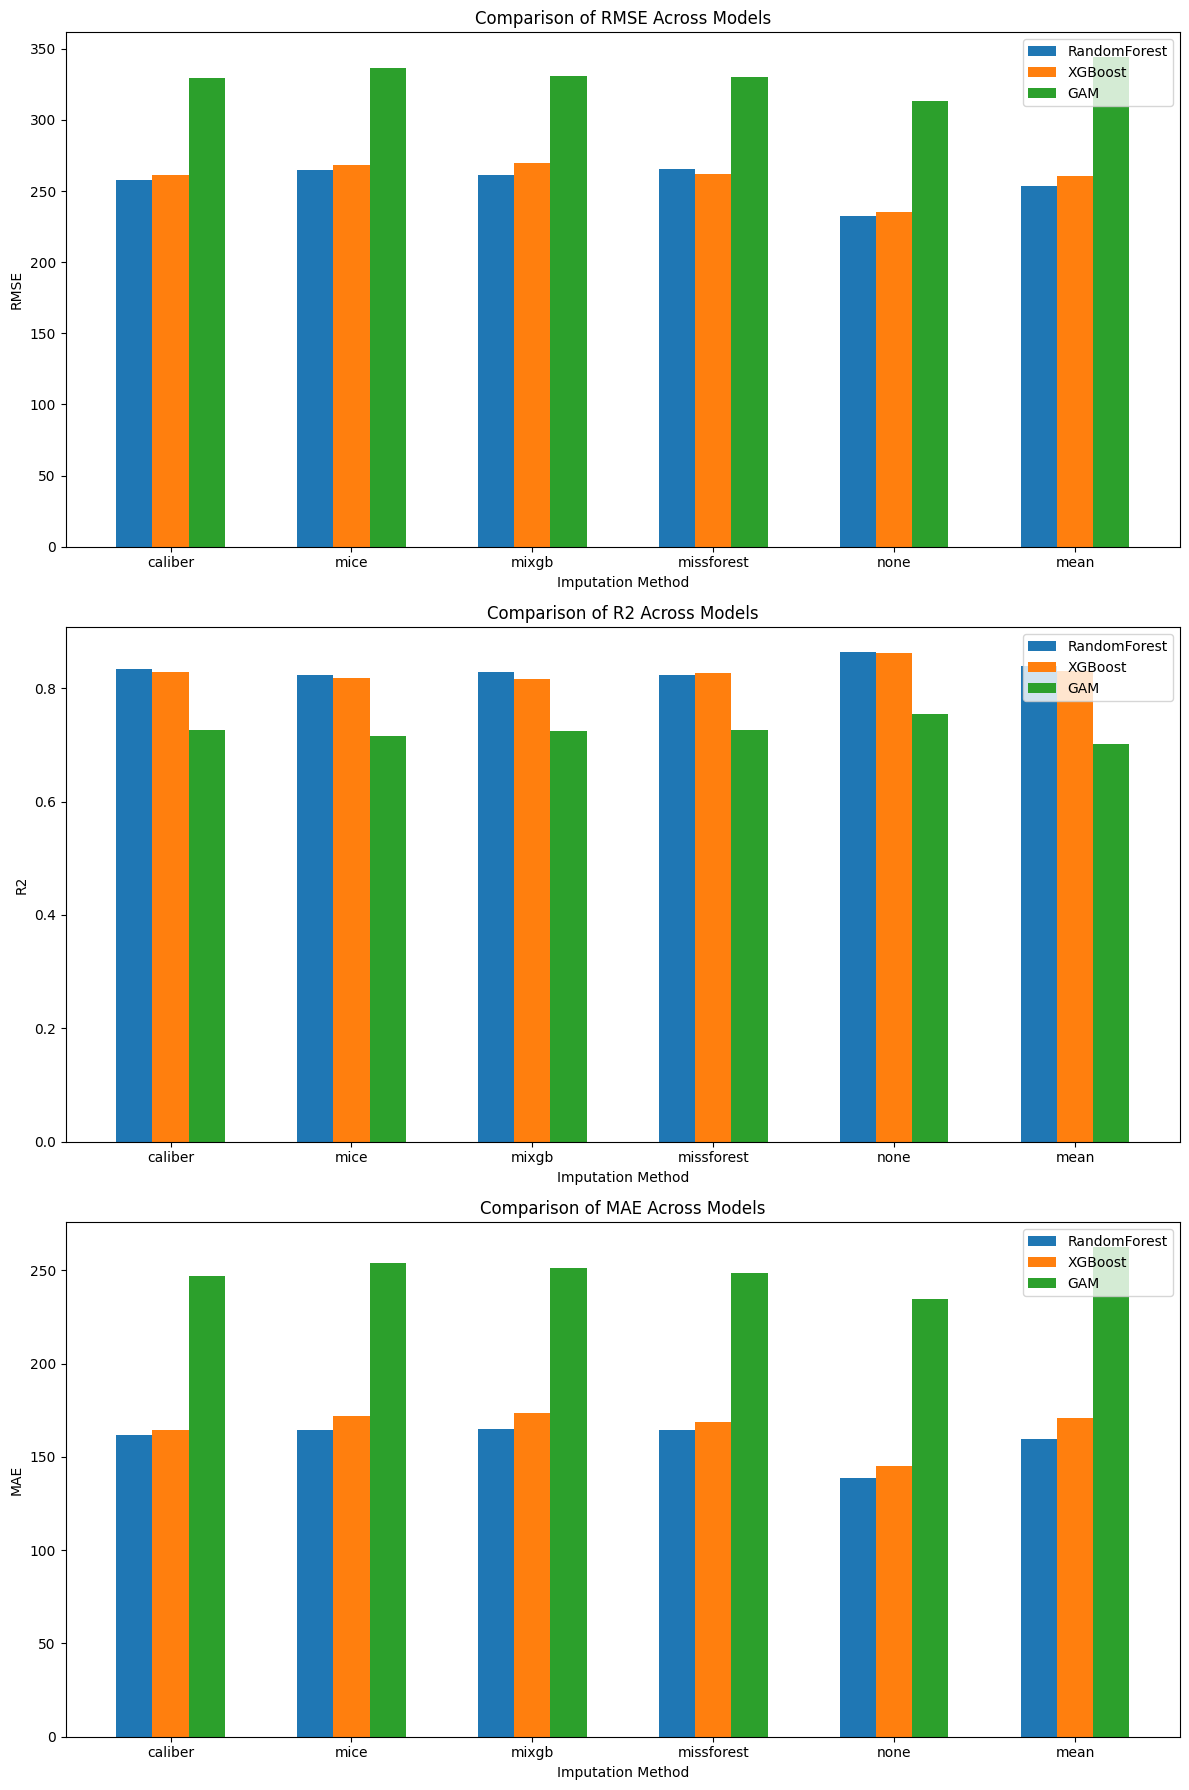

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from pygam import LinearGAM

imputed_datasets = {
    'caliber': imputed_data_caliber,
    'mice': imputed_data_mice,
    'mixgb': imputed_data_mixgb,
    'missforest': imputed_data_missforest,
    'none': data_to_use,
    'mean': data_missing_imputed
}


# Target variable
Y = data['Rented_Bike_Count']

# Function to run models
def run_models(X, Y):
    results = {}
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
    models = {
        'RandomForest': RandomForestRegressor(),
        'XGBoost': XGBRegressor(),
        'GAM': LinearGAM()
    }
    for name, model in models.items():
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        rmse = mean_squared_error(Y_test, predictions, squared=False)
        r2 = r2_score(Y_test, predictions)
        mae = mean_absolute_error(Y_test, predictions)
        results[name] = {'RMSE': rmse, 'R2': r2, 'MAE': mae}
    return results

# Store results
all_results = {name: run_models(dataset, Y) for name, dataset in imputed_datasets.items()}

# Visualization
num_methods = len(all_results)
num_models = 3  # RandomForest, XGBoost, GAM
index = np.arange(num_methods)
bar_width = 0.2

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for i, metric in enumerate(['RMSE', 'R2', 'MAE']):
    for j, model in enumerate(['RandomForest', 'XGBoost', 'GAM']):
        axes[i].bar(index + j*bar_width, [results[model][metric] for results in all_results.values()], bar_width, label=model)

    axes[i].set_xlabel('Imputation Method')
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'Comparison of {metric} Across Models')
    axes[i].set_xticks(index + bar_width)
    axes[i].set_xticklabels(all_results.keys())
    axes[i].legend()

plt.tight_layout()
plt.savefig('real_comparison_plot.png', dpi=300)
plt.show()



In [13]:
all_results

{'caliber': {'RandomForest': {'RMSE': 257.5201929952006,
   'R2': 0.8332856028572614,
   'MAE': 161.66195776255708},
  'XGBoost': {'RMSE': 261.01632916436586,
   'R2': 0.8287281916296289,
   'MAE': 164.41711349458728},
  'GAM': {'RMSE': 329.6092448943619,
   'R2': 0.7268826457955233,
   'MAE': 247.03197895927138}},
 'mice': {'RandomForest': {'RMSE': 264.4883404686029,
   'R2': 0.8241414081670871,
   'MAE': 164.30382420091325},
  'XGBoost': {'RMSE': 268.61984214634816,
   'R2': 0.8186044172644349,
   'MAE': 172.14055098253027},
  'GAM': {'RMSE': 336.5406853464378,
   'R2': 0.7152749501776227,
   'MAE': 254.09666850168122}},
 'mixgb': {'RandomForest': {'RMSE': 261.0388114031895,
   'R2': 0.8286986858930071,
   'MAE': 165.15196347031966},
  'XGBoost': {'RMSE': 269.80331651483635,
   'R2': 0.8170025256941741,
   'MAE': 173.53878829095376},
  'GAM': {'RMSE': 330.54405159774996,
   'R2': 0.7253312695321763,
   'MAE': 251.49190234656353}},
 'missforest': {'RandomForest': {'RMSE': 265.25261279